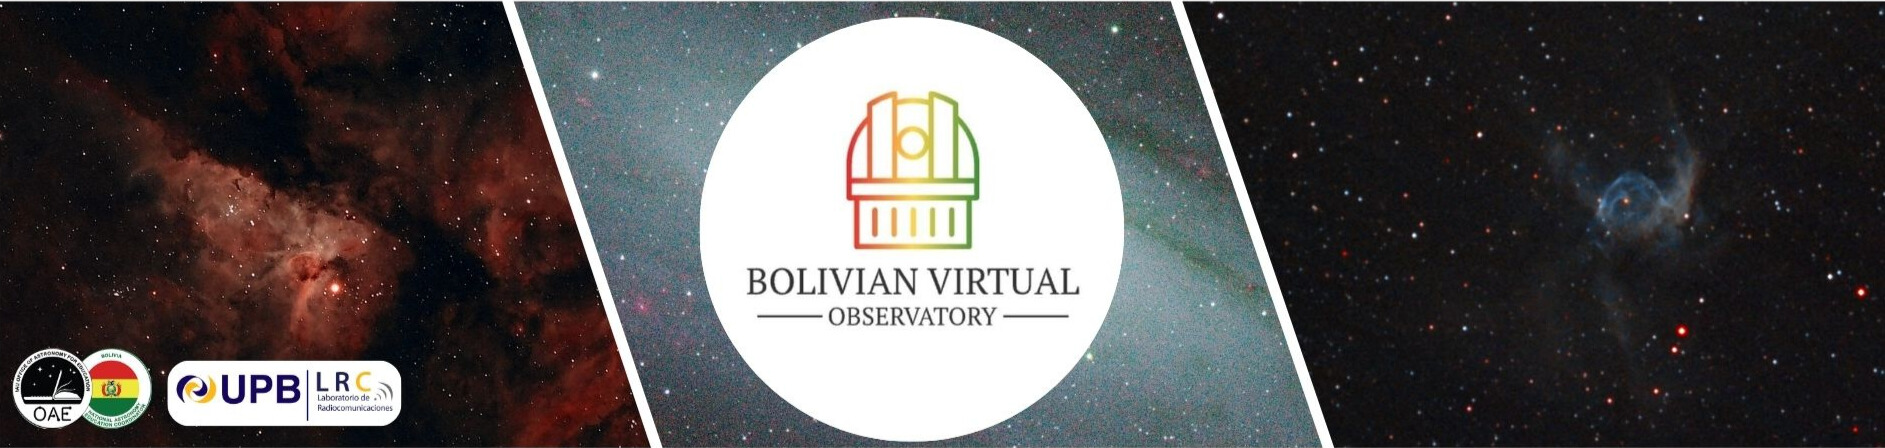

---

**[EN]**  
We present a Python script repository designed to automate the decompression and organization of `.fz` files into `.fits` format for the Bolivian Virtual Observatory (BVO) project.

The script uses the `astropy` library for file manipulation and is designed to handle batch decompression, organizing files into directories based on their base names. This repository is suitable for non-commercial research and training initiatives.  
Developed by Sarah C. Aranibar V. (sarah.aranibar@gmail.com) as part of the BVO project.  

The use of this repository for commercial purposes or academic training is prohibited without the explicit consent of the BVO project.

---

**[ES]**  
Presentamos un repositorio de scripts en Python diseñado para automatizar la descompresión y organización de archivos `.fz` en formato `.fits`, adaptado para el proyecto Bolivian Virtual Observatory (BVO).

El script utiliza la biblioteca `astropy` para la manipulación de archivos y está diseñado para manejar la descompresión en lotes, organizando los archivos en directorios basados en sus nombres base. Este repositorio es adecuado para iniciativas de investigación no comercial y programas de capacitación.  
Desarrollado por Sarah C. Aranibar V. (sarah.aranibar@gmail.com) como parte del proyecto BVO.  

El uso de este repositorio con fines comerciales o de formación académica está prohibido sin el consentimiento explícito del proyecto BVO.

---


# Notebook de Descompresión de Archivos FZ a FITS

Este notebook realiza la descompresión de archivos `.fz` a `.fits` organizándolos por carpetas.

### Características:
- **Organización por carpetas**: Los archivos descomprimidos se almacenan en carpetas según su nombre base.
- **Procesamiento en tandas**: Procesa múltiples archivos de manera automatizada.

### Requisitos:
1. Librería `astropy` instalada para manejar la descompresión.
2. Archivos `.fz` ubicados en un directorio definido.

# Importar librerías necesarias

En esta celda, se importan las librerías requeridas para la descompresión y manipulación de archivos.

In [1]:
import os
from astropy.io import fits
from tqdm import tqdm

# Parámetros iniciales

- `input_dir`: Directorio donde están ubicados los archivos `.fz`.
- `output_dir`: Directorio base donde se guardarán los archivos descomprimidos.
- Asegúrate de definir correctamente las rutas antes de ejecutar las siguientes celdas.

In [2]:
# Directorio de entrada (archivos .fz)
input_dir = r'C:\Users\Input_Dir'

# Directorio de salida (archivos .fits descomprimidos)
output_dir = r'C:\Users\FITS_Output'

# Crear directorio de salida

Esta función verifica si el directorio de salida existe y lo crea si es necesario.

In [3]:
def create_output_dir(directory):
    """Crea el directorio de salida si no existe."""
    if not os.path.exists(directory):
        os.makedirs(directory)

# Crear el directorio de salida
create_output_dir(output_dir)

# Función para descomprimir un archivo FZ

Esta función toma un archivo `.fz`, lo descomprime y lo guarda con el mismo nombre base en formato `.fits`.

In [4]:
def decompress_fz_to_fits(input_file, output_dir):
    """
    Descomprime un archivo FZ a FITS.

    Args:
        input_file (str): Ruta completa del archivo .fz.
        output_dir (str): Directorio de salida para el archivo descomprimido.
    """
    try:
        # Abrir el archivo FZ
        with fits.open(input_file) as hdul:
            # Generar el nombre de salida
            base_name = os.path.basename(input_file).replace('.fz', '')
            output_file = os.path.join(output_dir, base_name)

            # Guardar como archivo .fits
            hdul.writeto(output_file, overwrite=True)
            print(f"Archivo descomprimido: {output_file}")
    except Exception as e:
        print(f"Error descomprimiendo {input_file}: {e}")

# Procesar múltiples archivos FZ en tandas

Esta función busca todos los archivos `.fz` en el directorio de entrada, organiza los resultados en subcarpetas según el nombre base, y descomprime cada archivo a `.fits`.

In [5]:
def decompress_batch(input_dir, output_dir):
    """
    Procesa todos los archivos .fz en el directorio de entrada.

    Args:
        input_dir (str): Directorio con los archivos .fz.
        output_dir (str): Directorio base para los archivos descomprimidos.
    """
    # Buscar todos los archivos .fz en el directorio de entrada
    files = [f for f in os.listdir(input_dir) if f.endswith('.fz')]

    for file in tqdm(files, desc="Procesando archivos FZ", unit="archivo"):
        input_file = os.path.join(input_dir, file)

        # Crear subcarpeta según el nombre base (sin extensión)
        base_name = os.path.splitext(file)[0]
        subfolder = os.path.join(output_dir, base_name)
        create_output_dir(subfolder)

        # Descomprimir archivo en la subcarpeta
        decompress_fz_to_fits(input_file, subfolder)

# Ejecución del proceso de descompresión

Define las rutas de entrada y salida en las celdas anteriores, y ejecuta esta celda para procesar todos los archivos en tandas.

In [6]:
decompress_batch(input_dir, output_dir)
print("Proceso de descompresión completado.")

Procesando archivos FZ: 100%|███████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.40archivo/s]

Archivo descomprimido: C:\Users\Sarah\BVO\Descargas\FITS_Output1\coj0m421-sq37-20241021-0109-e91.fits\coj0m421-sq37-20241021-0109-e91.fits
Archivo descomprimido: C:\Users\Sarah\BVO\Descargas\FITS_Output1\coj0m421-sq37-20241021-0110-e91.fits\coj0m421-sq37-20241021-0110-e91.fits
Archivo descomprimido: C:\Users\Sarah\BVO\Descargas\FITS_Output1\coj0m421-sq37-20241021-0111-e91.fits\coj0m421-sq37-20241021-0111-e91.fits


Procesando archivos FZ: 100%|███████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.40archivo/s]

Proceso de descompresión completado.
